<a href="https://colab.research.google.com/github/janvi432/Final-Portfolio-Classification-Task/blob/main/2513327_JanviPradhanang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Janvi Pradhanang

Student ID: 2513327

**Analysis of Gender Inequality Index**

In [1]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

In [2]:
# Load the Dataset
df = pd.read_csv("Gender_Inequality_Index.csv")
df.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


**Dataset Description**



*  **When and by whom the dataset was created?**


     The Gender Inequality Index (GII) dataset was originally created by United Nations Development Programme (UNDP) as part of its annual Human Development Reports, first introduced in 2010. The dataset was later compiled and made publicly available on Kaggle by Gianina Maria Petrascu.




*   **How and from where the dataset was accessed?**
    
     The dataset was accessed from Kaggle an open data platform, it was downloaded in csv format and loaded into pandas DataFrame for analysis.

     [Gender Inequality Index](https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index)







*   **How it aligns with the chosen UNSDG.**
     
     The dataset relates to **UN SDG 5: Gender Equality**, as it measures gender-based inequalities in health, education, political representation, and labor force participation.
      




*    **List all attributes (columns) with brief descriptions.**
      
      1. GII : Gender Inequality Index score

      2. Maternal_mortality : Maternal deaths per 100,000 live births

      3. Adolescent_birth_rate : Births per 1,000 women aged 15–19

      4. F_secondary_educ : Percentage of women with at least secondary education

      5. M_secondary_educ : Percentage of men with at least secondary education

      6. F_labor_force : Female labor force participation rate

      7. M_labor_force : Male labor force participation rate

      8. Rank : Country’s rank based on Gender Inequality Index

      9. Human_developmentencoded : Target variable










*   **Potential Questions the Dataset Could Help Answer:**

      

1.   How do gender inequality indicators affect human development levels?

2.   Which countries exhibit the largest disparities between males and females in education or labor participation?


3.    Does higher female political representation correlate with improved health or education outcomes for women?








**Initial Dataset Exploration**

In [3]:
# Dataset shape
print("Rows, Columns:", df.shape)

Rows, Columns: (195, 11)


In [4]:
# Dataset types
print("Column Data Types (Before Conversion):")
df.dtypes

Column Data Types (Before Conversion):


,0
Country,object
Human_development,object
GII,float64
Rank,float64
Maternal_mortality,float64
Adolescent_birth_rate,float64
Seats_parliament,float64
F_secondary_educ,float64
M_secondary_educ,float64
F_Labour_force,float64


In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB


In [6]:
# Summary statistics
df.describe()

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
count,170.000000,170.000000,184.000000,195.000000,193.000000,177.000000,177.000000,180.000000,180.000000
mean,0.344376,85.376471,160.027174,44.597949,24.701554,62.706780,67.068362,50.224444,69.863333
std,0.197105,49.210206,233.028867,38.422479,12.404319,29.528487,26.450033,15.905491,9.012734
min,0.013000,1.000000,2.000000,1.600000,0.000000,6.400000,13.000000,6.000000,43.900000
25%,0.177500,43.250000,12.750000,10.750000,16.500000,37.700000,44.800000,42.400000,65.050000
50%,0.363000,85.500000,53.000000,36.200000,23.600000,69.900000,71.200000,52.150000,69.350000
75%,0.505750,127.750000,188.250000,64.200000,33.600000,90.200000,92.500000,60.475000,75.525000
max,0.820000,170.000000,1150.000000,170.500000,55.700000,100.000000,100.000000,83.100000,95.500000


In [7]:
# Missing value
df.isnull().sum()

,0
Country,0
Human_development,4
GII,25
Rank,25
Maternal_mortality,11
Adolescent_birth_rate,0
Seats_parliament,2
F_secondary_educ,18
M_secondary_educ,18
F_Labour_force,15


In [8]:
# Check class imbalance in target variable
# Class counts
df["Human_development"].value_counts()

# Class proportions
df["Human_development"].value_counts(normalize=True)

,proportion
Human_development,
Very high,0.345550
High,0.256545
Medium,0.230366
Low,0.167539


 **Dataset Quality Assessment**

   The dataset was analyzed for quality in terms of missing values, class imbalance, relevance, and noise.

- **Missing Values:** The dataset has some missing values, mostly in GII and Rank, while several columns have very few missing values.


- **Class Imbalance:** The target variable Human_development is moderately balanced, with no extreme class imbalance.


- **Relevance:** The dataset is highly relevant to SDG 5 (Gender Equality), as it contains indicators of education, labor participation, political representation, and health outcomes for women.


- **Noise:** The dataset has low noise, as values are consistent and reliable.

**1. Exploratory Data Analysis (EDA) - Data Cleaning :**

In [9]:
# Remove rows where target variable is missing
df= df.dropna(subset=["Human_development"])

In [10]:
# Define numeric columns for analysis
numeric_cols = [
"GII", "Rank", "Maternal_mortality", "Adolescent_birth_rate",
"Seats_parliament", "F_secondary_educ", "M_secondary_educ",
"F_Labour_force", "M_Labour_force"
]

# Convert numeric columns stored as text to numeric type
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill remaining missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [11]:
# Verify missing values after cleaning
print("Missing values after cleaning:")
print(df[numeric_cols].isnull().sum())

Missing values after cleaning:
GII                      0
Rank                     0
Maternal_mortality       0
Adolescent_birth_rate    0
Seats_parliament         0
F_secondary_educ         0
M_secondary_educ         0
F_Labour_force           0
M_Labour_force           0
dtype: int64




*   Rows with missing values in the target variable Human Development  were removed to ensure valid classification.



In [12]:
# Encode target variable for modeling
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Human_developmentencoded"] = LE.fit_transform(df["Human_development"])



*   The categorical target variable Human Development was encoded into numeric form using Label Encoding, as machine learning models require numerical class values.



In [13]:
# Summary statistics for numeric column
df[numeric_cols].describe()

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,0.346424,85.390052,151.829843,44.484817,24.757068,63.234031,67.371204,50.367801,69.863089
std,0.185986,46.411103,224.499487,38.185359,12.400821,28.481873,25.479797,15.172850,8.509166
min,0.013000,1.000000,2.000000,1.600000,0.000000,6.400000,13.000000,6.000000,43.900000
25%,0.196000,48.500000,14.500000,11.100000,16.600000,40.350000,48.100000,43.350000,65.500000
50%,0.363000,85.500000,52.500000,36.200000,23.600000,69.900000,71.200000,52.150000,69.350000
75%,0.491000,122.500000,180.000000,64.150000,33.600000,88.700000,91.850000,59.500000,75.250000
max,0.820000,170.000000,1150.000000,170.500000,55.700000,100.000000,100.000000,83.100000,95.500000




*   Summary statistics such as mean, median, standard deviation were computed to understand data spread and potential outliers.



**Target Variable Distribution**

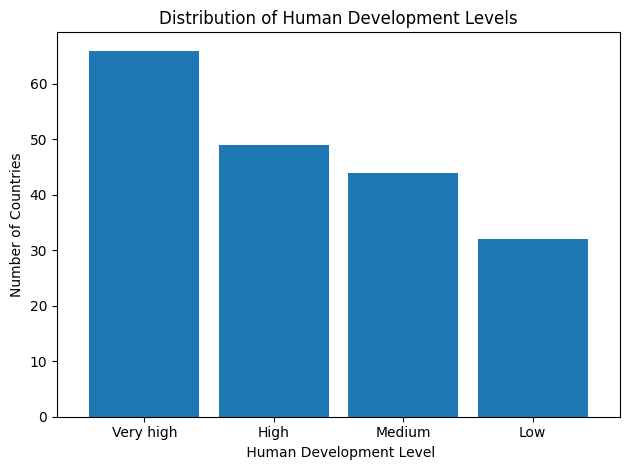

In [14]:
# Bar plot for Distribution of Target Variable
df["Human_development"].value_counts().plot(kind="bar",width=0.85)
plt.title("Distribution of Human Development Levels")
plt.xlabel(" Human Development Level")
plt.ylabel("Number of Countries")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



*   The bar plot shows the distribution of countries across different human development levels in the Gender Inequality dataset. Most countries fall into the "Very High" and "High" development categories, while fewer countries are classified as "Medium" and "Low" human development.This uneven distribution indicates class imbalance in the target variable, which is important to consider when training and evaluating classification models.




**Feature Correlations**

In [15]:
# Features
X = df.drop(columns=["Human_development", "Human_developmentencoded", "Country"])
X = X.select_dtypes(include=["int64", "float64"])

# Target for EDA
y = df["Human_developmentencoded"]

# Check missing values in X and y
print("Missing values in X:\n", X.isnull().sum())
print("\nMissing values in y:\n", y.isnull().sum())

Missing values in X:
 GII                      0
Rank                     0
Maternal_mortality       0
Adolescent_birth_rate    0
Seats_parliament         0
F_secondary_educ         0
M_secondary_educ         0
F_Labour_force           0
M_Labour_force           0
dtype: int64

Missing values in y:
 0


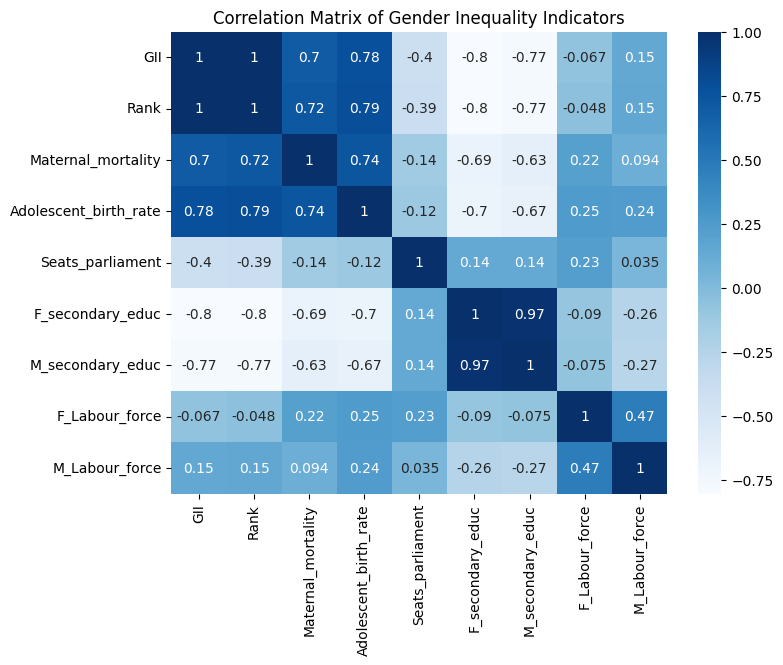

In [16]:
# Correlation heatmap of gender inequality indicators
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Matrix of Gender Inequality Indicators")
plt.show()



*   The heatmap above shows the correlation matrix of gender inequality indicators. GII and Rank are perfectly correlated. Maternal mortality and adolescent birth rate rise with higher GII. Female and male secondary education are highly correlated (0.97), showing similar education trends across genders.The number of seats in parliament has a negative correlation with GII (-0.4), implying that increased female representation lowers inequality.




**Feature Distributions**

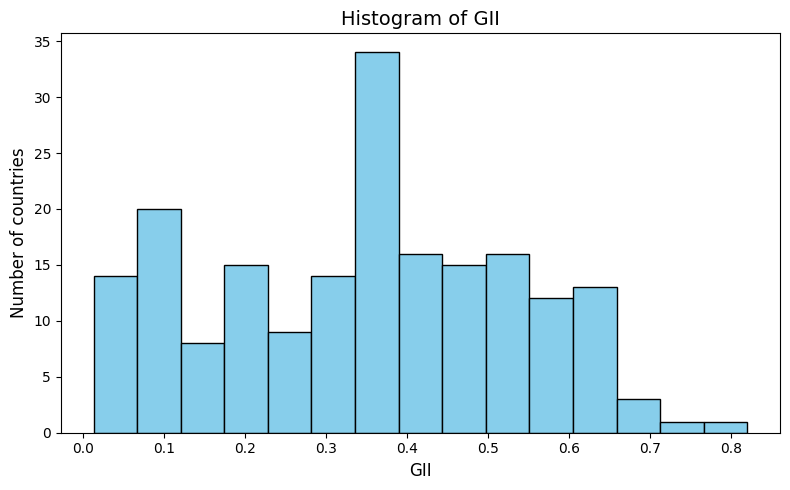

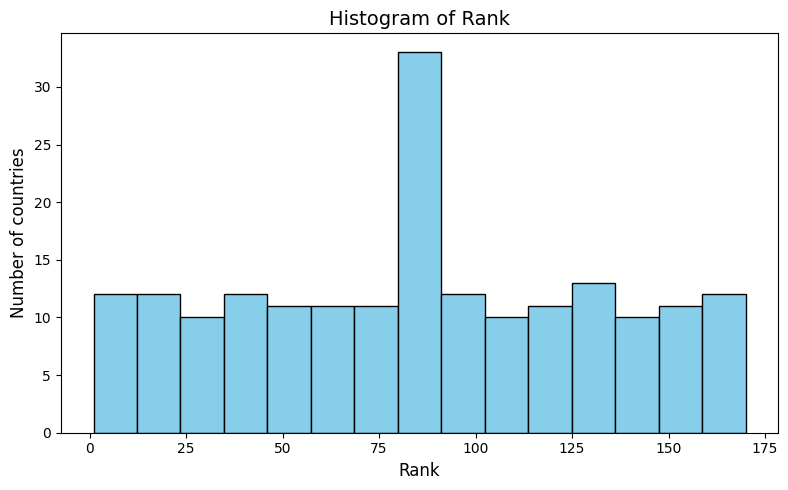

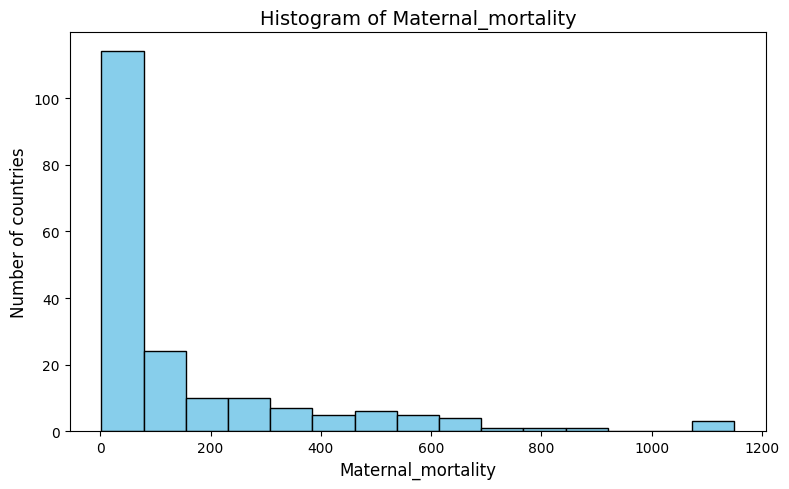

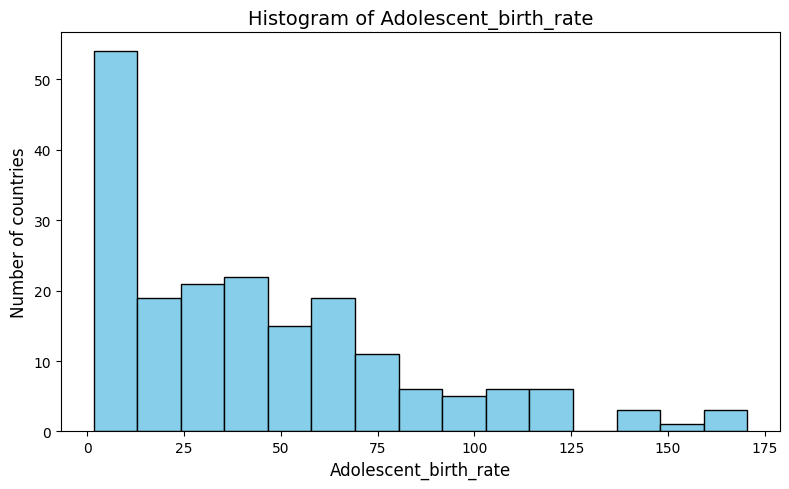

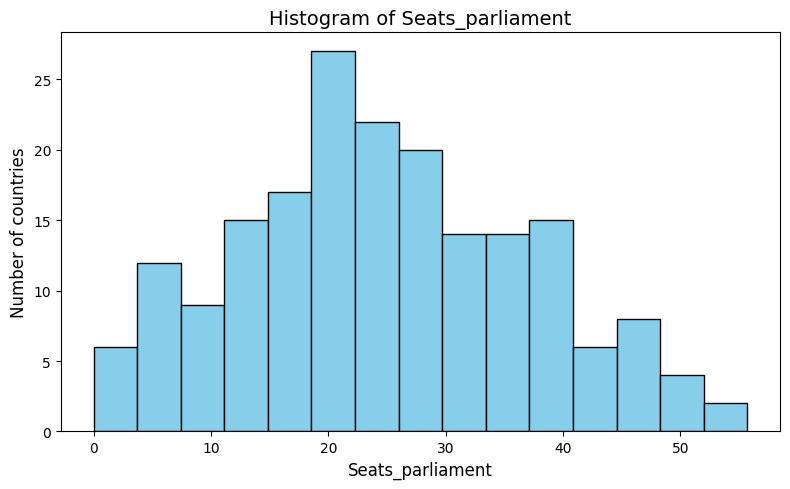

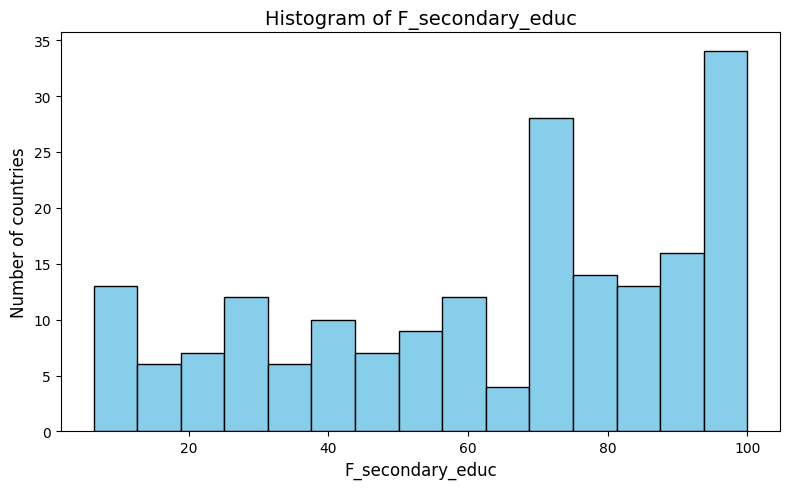

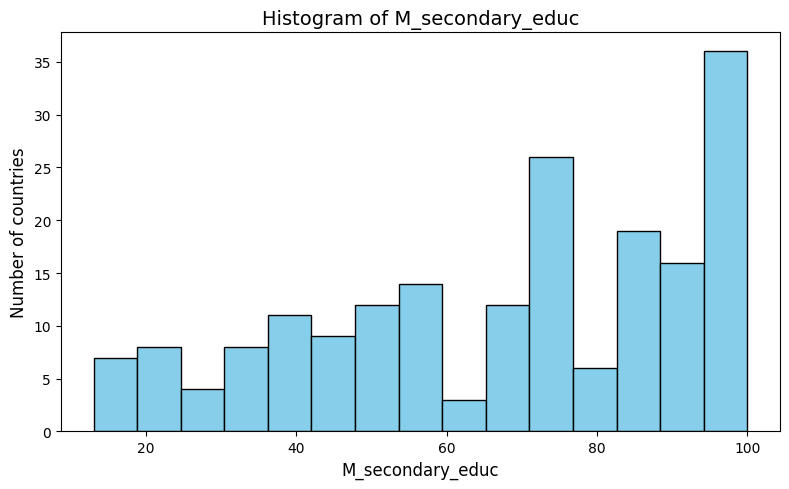

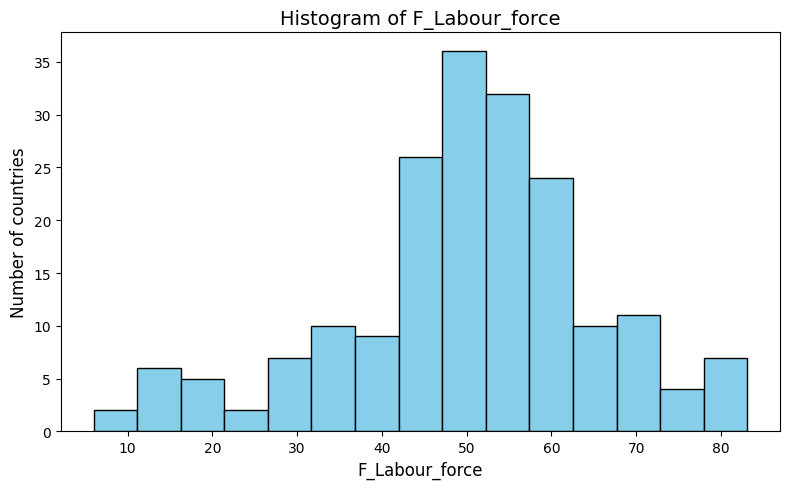

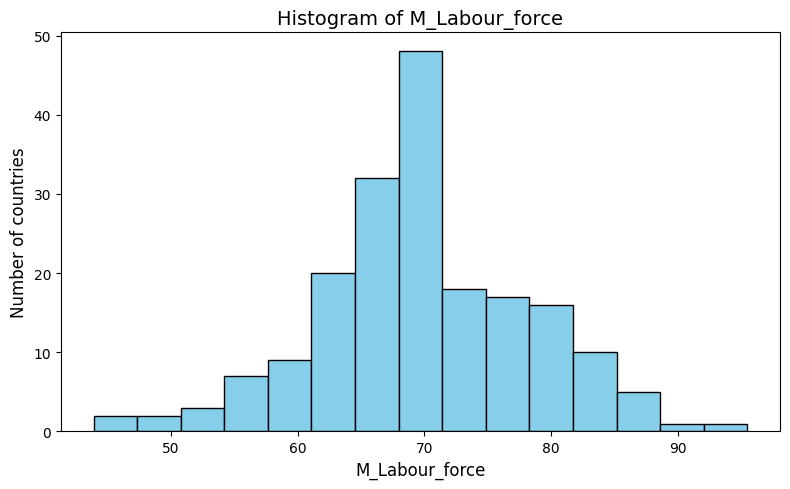

In [17]:
# Histograms of all features
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Number of countries", fontsize=12)
    plt.tight_layout()
    plt.show()



*   Overall, the histogram shows the feature distribution of gender-related and health indicators across countries. Adolescent birth rates and maternal mortality show strong right skewness, indicating that  most countries have relatively low values, but a few countries have very high values. Although secondary education completion is generally high for both genders, males are more concentrated at the highest levels, whereas females display greater variation at lower levels,indicating educational gaps.


In [18]:
# Split data into Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)

Training features shape: (152, 9)
Training target shape: (152,)


In [19]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled test features shape:", X_test_scaled.shape)

Scaled training features shape: (152, 9)
Scaled test features shape: (39, 9)


 **2. Neural Network Model (MLPClassifier)**

In [20]:
# Define the Neural Network classifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=3000,
    random_state=42
)

# Train the neural network on scaled features
mlp_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=3000, random_state=42)



*   A Multi-Layer Perceptron (MLP) was implemented for multi-class classification. The network consists of an input layer correspoding to the gender-related features, followed by two hidden layers with 64 and 32 neurons using ReLU activation function. The output layer performs multi-class classification using a logistic (softmax) function.The model was trained using the Adam optimizer with log-loss as objective function. Model performance was evaluated on both training and test sets using accuracy, precision, recall, and F1-score.


In [21]:
# Evaluate on training set
y_train_pred = mlp_model.predict(X_train_scaled)
print("Neural Network Training Set Evaluation")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Neural Network Training Set Evaluation
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        53

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

Confusion Matrix:
 [[39  0  0  0]
 [ 0 25  0  0]
 [ 0  0 35  0]
 [ 0  0  0 53]]


In [22]:
# Evaluate on test set
y_test_pred = mlp_model.predict(X_test_scaled)
print("Neural Network Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Neural Network Test Set Evaluation
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.56      0.71      0.62         7
           2       0.57      0.44      0.50         9
           3       0.85      0.85      0.85        13

    accuracy                           0.67        39
   macro avg       0.64      0.65      0.64        39
weighted avg       0.67      0.67      0.66        39

Confusion Matrix:
 [[ 6  1  1  2]
 [ 0  5  2  0]
 [ 2  3  4  0]
 [ 2  0  0 11]]




*   The neural network achieved 100% training accuracy but only 67% on the test set which indicates overfitting. Class 3 performed best, while other classes had more misclassifications. The metrics used for evaluation were accuracy, precision, recall, and F1-Score.


**3. Classical ML Models: Logistic Regression & Decision Tree**

In [23]:
# Logistic Regression (Original Model)
log_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression - Original Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression - Original Model
Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        10
           1       0.75      0.86      0.80         7
           2       0.40      0.44      0.42         9
           3       0.69      0.69      0.69        13

    accuracy                           0.54        39
   macro avg       0.52      0.55      0.53        39
weighted avg       0.52      0.54      0.53        39

Confusion Matrix:
 [[2 0 4 4]
 [0 6 1 0]
 [3 2 4 0]
 [3 0 1 9]]


In [24]:
# Decision Tree (Original Model)
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree - Original Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Original Model
Accuracy: 0.5897435897435898
              precision    recall  f1-score   support

           0       0.40      0.60      0.48        10
           1       0.83      0.71      0.77         7
           2       0.44      0.44      0.44         9
           3       0.89      0.62      0.73        13

    accuracy                           0.59        39
   macro avg       0.64      0.59      0.61        39
weighted avg       0.65      0.59      0.61        39

Confusion Matrix:
 [[6 0 3 1]
 [0 5 2 0]
 [4 1 4 0]
 [5 0 0 8]]




*   Two Classical Models, Logistic Regression and Decision Tree were trained and evaluated. The Decision Tree achieved an accuracy of 0.59, performing well for class 3, while Logistic Regression achieved 0.54, performing better for class 1. Overall, the Decision Tree was more effective at capturing non-linear patterns in the data, making it the better choice for this dataset.


**4. Hyper-parameter Optimization with Cross-Validation**

In [25]:
# Logistic Regression Hyperparameter Tuning
log_model_tune = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_log = GridSearchCV(estimator=log_model_tune,
                        param_grid=param_grid_log,
                        cv=5,
                        scoring='accuracy')

grid_log.fit(X_train_scaled, y_train)

print("Best Hyperparameters - Logistic Regression:", grid_log.best_params_)
print("Best CV Score:", grid_log.best_score_)

Best Hyperparameters - Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Best CV Score: 0.7180645161290323


In [26]:
# Decision Tree Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy'
)


grid_dt.fit(X_train, y_train)

print("Best Hyperparameters - Decision Tree:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

Best Hyperparameters - Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score: 0.6451612903225806




*   Hyper-parameter tuning was performed using GridSearchCV for both models. For Logistic Regression, the best parameters were C=0.01 and solver='lbfgs', with a cross-validation score of 0.718. Whereas, for Decision Tree, the best hyperparameters were 'max_depth = None', 'min_samples_leaf = 1', and 'min_samples_split = 5', achieving a best cross-validation score of 0.65. Overall, Logistic Regression benefited more from hyperparameter optimization compared to the Decision Tree.

**5. Feature Selection**

In [27]:
# Logistic Regression
rfe_log = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
              n_features_to_select=5)
rfe_log.fit(X_train_scaled, y_train)
selected_features_log = X.columns[rfe_log.support_]
print("Selected features (Logistic Regression):", selected_features_log)

Selected features (Logistic Regression): Index(['GII', 'Rank', 'Maternal_mortality', 'Adolescent_birth_rate',
       'F_secondary_educ'],
      dtype='object')


In [28]:
# Decision Tree
rfe_dt = RFE(estimator= DecisionTreeClassifier (random_state=42, class_weight='balanced'), n_features_to_select=8)
rfe_dt.fit(X_train, y_train)
selected_features_dt = X.columns[rfe_dt.support_]
print("Selected features (Decision Tree):", selected_features_dt)

Selected features (Decision Tree): Index(['GII', 'Rank', 'Maternal_mortality', 'Adolescent_birth_rate',
       'Seats_parliament', 'F_secondary_educ', 'M_secondary_educ',
       'F_Labour_force'],
      dtype='object')




*   Feature selection was performed using a wrapper-based Recursive Feature Elimination (RFE) technique which removes less informative features by repeatedly training the model and imrpoves performance


    Using RFE, Logistic Regression selected **GII, Rank, Maternal_mortality, Adolescent_birth_rate, and F_secondary_educ**, as these features had the strongest influence on its linear decision boundary.
    
    The Decision Tree selected a broader set of features, including **Seats_parliament, M_secondary_educ, and F_Labour_force**, because it can capture non-linear relationships and feature interactions.

**6. Final Models and Comparative Analysis**

In [29]:
# Logistic Regression Final Model
X_train_log_fs = X_train_scaled[:, rfe_log.support_]
X_test_log_fs = X_test_scaled[:, rfe_log.support_]

final_log_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=grid_log.best_params_['C'],
    solver=grid_log.best_params_['solver'],
    class_weight='balanced'
)


final_log_model.fit(X_train_log_fs, y_train)
y_pred_final_log = final_log_model.predict(X_test_log_fs)

print("Logistic Regression Final Model")
print("Accuracy:", accuracy_score(y_test, y_pred_final_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final_log))

Logistic Regression Final Model
Accuracy: 0.5384615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.20      0.21        10
           1       0.75      0.86      0.80         7
           2       0.43      0.33      0.38         9
           3       0.67      0.77      0.71        13

    accuracy                           0.54        39
   macro avg       0.52      0.54      0.52        39
weighted avg       0.51      0.54      0.52        39

Confusion Matrix:
 [[ 2  0  3  5]
 [ 0  6  1  0]
 [ 4  2  3  0]
 [ 3  0  0 10]]


In [30]:
# Decision Tree Final Model
X_train_dt_fs = X_train[selected_features_dt]
X_test_dt_fs = X_test[selected_features_dt]

final_dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=grid_dt.best_params_['max_depth'],
    min_samples_split=grid_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_dt.best_params_['min_samples_leaf'],
    class_weight='balanced'
)

final_dt_model.fit(X_train_dt_fs, y_train)
y_pred_final_dt = final_dt_model.predict(X_test_dt_fs)

print("Decision Tree Final Model")
print("Accuracy:", accuracy_score(y_test, y_pred_final_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final_dt))

Decision Tree Final Model
Accuracy: 0.5897435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.60      0.48        10
           1       0.75      0.86      0.80         7
           2       0.43      0.33      0.38         9
           3       0.89      0.62      0.73        13

    accuracy                           0.59        39
   macro avg       0.62      0.60      0.60        39
weighted avg       0.63      0.59      0.60        39

Confusion Matrix:
 [[6 0 3 1]
 [0 6 1 0]
 [4 2 3 0]
 [5 0 0 8]]




*   After applying Recursive Feature Elimination (RFE), the number of features was reduced for both Logistic Regression and Decision Tree. However, the model accuracy remained the same. This suggests that the removed features were either redundant or had minimal impact on the prediction, and the remaining features were sufficient to capture the patterns in the data.



In [31]:
# List of models, predictions, features used, CV scores
models_info = [
    ("Neural Network", y_test_pred, X_train_scaled.shape[1], None),  # No CV
    ("Logistic Regression - Original", y_pred_log, X_train_scaled.shape[1], None),
    ("Decision Tree - Original", y_pred_dt, X_train.shape[1], None),
    ("Logistic Regression - Tuned", grid_log.predict(X_test_scaled), X_train_scaled.shape[1], grid_log.best_score_),
    ("Decision Tree - Tuned", grid_dt.predict(X_test), X_train.shape[1], grid_dt.best_score_),
    ("Logistic Regression - Final", y_pred_final_log, X_train_log_fs.shape[1], None),
    ("Decision Tree - Final", y_pred_final_dt, X_train_dt_fs.shape[1], None)
]

In [32]:
# Build comparison table
comparison_table = pd.DataFrame([{
    "Model": name,
    "Features": features,
    "CV Score": round(cv, 2) if cv is not None else None,
    "Accuracy": round(accuracy_score(y_test, y_pred), 2),
    "Precision": round(precision_score(y_test, y_pred, average='weighted'), 2),
    "Recall": round(recall_score(y_test, y_pred, average='weighted'), 2),
    "F1-Score": round(f1_score(y_test, y_pred, average='weighted'), 2)
} for name, y_pred, features, cv in models_info])

# Display the table
comparison_table

,Model,Features,CV Score,Accuracy,Precision,Recall,F1-Score
0,Neural Network,9,NaN,0.67,0.67,0.67,0.66
1,Logistic Regression - Original,9,NaN,0.54,0.52,0.54,0.53
2,Decision Tree - Original,9,NaN,0.59,0.65,0.59,0.61
3,Logistic Regression - Tuned,9,0.72,0.56,0.52,0.56,0.53
4,Decision Tree - Tuned,9,0.65,0.59,0.63,0.59,0.60
5,Logistic Regression - Final,5,NaN,0.54,0.51,0.54,0.52
6,Decision Tree - Final,8,NaN,0.59,0.63,0.59,0.60




*   The final models were trained using selected features and optimized hyperparameters. The Neural Network achieved the highest accuracy (0.67). Among the classical models, the Decision Tree consistently outperformed Logistic Regression in terms of accuracy and F1-score. Overall, the Decision Tree was the better classical model, while the Neural Network showed the best overall performance.

